<a href="https://colab.research.google.com/github/Giuliana-24/PROYECTOS_DS/blob/main/Proy3/dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis Predictivo del comportamiento y evolución del Dengue usando modelos de Machine Learning


En este notebook vamos a desarrollar un proyecto a partir de la base de datos del MINSA hallados en la plataforma de datos abiertos. Durante este trabajo aplicaremos conocimientos de ciencia de datos, empezando por el Analisis Exploratorio de datos, transformando y codificando datos, hasta implementar redes neuronales para la preddicción y estimacion de brotes de dengue de acuerdo a la estación y zona geografica





---


Importamos librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

Cargamos los Datos

In [ ]:
# URL de Google Drive modificada
url = 'https://drive.google.com/uc?id=1vWKCE2NGoFEZmVc_38oOD4TA5NOC-NzA'

# Leer el CSV directamente desde el enlace
df = pd.read_csv(url)

# Mostrar las primeras filas
df.head()


,departamento,provincia,distrito,enfermedad,año,semana,diagnostic,tipo_dx,diresa,ubigeo,edad,tipo_edad,sexo
0,HUANUCO,LEONCIO PRADO,LUYANDO,DENGUE SIN SIGNOS DE ALARMA,2000,47,A97.0,P,10.0,100605,9,A,M
1,HUANUCO,LEONCIO PRADO,LUYANDO,DENGUE SIN SIGNOS DE ALARMA,2000,40,A97.0,P,10.0,100605,18,A,F
2,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,DENGUE SIN SIGNOS DE ALARMA,2000,48,A97.0,C,10.0,100604,32,A,F
3,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,DENGUE SIN SIGNOS DE ALARMA,2000,37,A97.0,P,10.0,100604,40,A,F
4,HUANUCO,LEONCIO PRADO,MARIANO DAMASO BERAUN,DENGUE SIN SIGNOS DE ALARMA,2000,42,A97.0,C,10.0,100606,16,A,M


In [ ]:
df.dtypes

,0
departamento,object
provincia,object
distrito,object
enfermedad,object
año,int64
semana,int64
diagnostic,object
tipo_dx,object
diresa,float64
ubigeo,int64


In [ ]:
df.describe()


,año,semana,diresa,ubigeo,edad
count,757890.000000,757890.000000,757867.000000,757890.000000,7.578900e+05
mean,2017.558349,22.469383,23.132393,163386.332926,1.888111e+02
std,6.336153,13.263495,11.275111,58109.639719,9.579848e+04
min,2000.000000,1.000000,2.000000,10101.000000,0.000000e+00
25%,2014.000000,13.000000,14.000000,130106.000000,1.500000e+01
50%,2020.000000,20.000000,22.000000,160301.000000,2.700000e+01
75%,2023.000000,29.000000,32.000000,200601.000000,4.200000e+01
max,2023.000000,53.000000,53.000000,250401.000000,7.196364e+07


##Preparacion y Limpieza de Datos

Limpieza e Unificacion de Datos para columnas redundantes. Creacion de nueva variable.

In [ ]:
# Estandarizamos a edad años
def convertir_a_años(row):
    if row['tipo_edad'] == 'A':
        return row['edad']  # Edad ya está en años
    elif row['tipo_edad'] == 'M':
        return row['edad'] / 12  # Convertir meses a años
    elif row['tipo_edad'] == 'D':
        return row['edad'] / 365.25  # Convertir días a años
    else:
        return None  # En caso de que haya un valor inesperado

# Asinar a columna 'edad_px'
df['edad_px'] = df.apply(convertir_a_años, axis=1)

# Eliminamos'edad' y 'tipo_edad'
df.drop(columns=['edad', 'tipo_edad'], inplace=True)

df.head()


,departamento,provincia,distrito,enfermedad,año,semana,diagnostic,tipo_dx,diresa,ubigeo,sexo,edad_px
0,HUANUCO,LEONCIO PRADO,LUYANDO,DENGUE SIN SIGNOS DE ALARMA,2000,47,A97.0,P,10.0,100605,M,9.0
1,HUANUCO,LEONCIO PRADO,LUYANDO,DENGUE SIN SIGNOS DE ALARMA,2000,40,A97.0,P,10.0,100605,F,18.0
2,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,DENGUE SIN SIGNOS DE ALARMA,2000,48,A97.0,C,10.0,100604,F,32.0
3,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,DENGUE SIN SIGNOS DE ALARMA,2000,37,A97.0,P,10.0,100604,F,40.0
4,HUANUCO,LEONCIO PRADO,MARIANO DAMASO BERAUN,DENGUE SIN SIGNOS DE ALARMA,2000,42,A97.0,C,10.0,100606,M,16.0


Eliminacion de columnas poco relevantes:

Esto no permite optimizar el procesamiento del modelo, al no tener tantos datos que analizar

In [ ]:
# Eliminamos columnas
df.drop(columns=['diagnostic', 'diresa','ubigeo'], inplace=True)

#Mostramos dataframe actualizado
df.head()

,departamento,provincia,distrito,enfermedad,año,semana,tipo_dx,sexo,edad_px
0,HUANUCO,LEONCIO PRADO,LUYANDO,DENGUE SIN SIGNOS DE ALARMA,2000,47,P,M,9.0
1,HUANUCO,LEONCIO PRADO,LUYANDO,DENGUE SIN SIGNOS DE ALARMA,2000,40,P,F,18.0
2,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,DENGUE SIN SIGNOS DE ALARMA,2000,48,C,F,32.0
3,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,DENGUE SIN SIGNOS DE ALARMA,2000,37,P,F,40.0
4,HUANUCO,LEONCIO PRADO,MARIANO DAMASO BERAUN,DENGUE SIN SIGNOS DE ALARMA,2000,42,C,M,16.0


Verificacion de Valores Atipicos: A traves de box plots se reconoce datos atípicos en la edad del paciente (edad_px), a continuacion se reconocera cuales son esos datos especificamente.

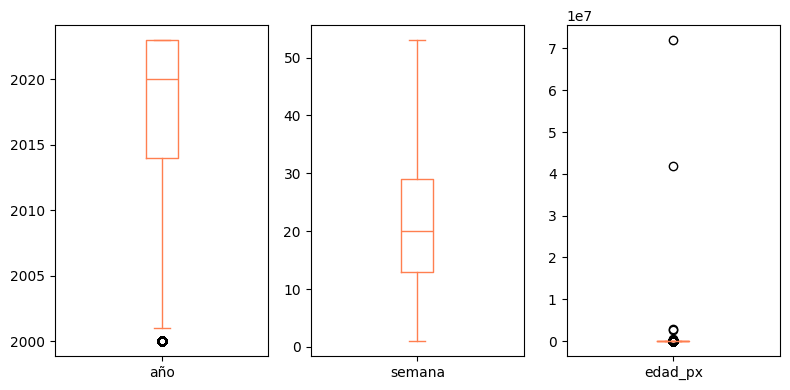

In [ ]:
#Verificar si hay valores atipicos
dfnum=df.select_dtypes(include=["int64","float64"]).columns
dfnum
# Boxplot para visualizar si existen valores atipicos
df[dfnum[:3]].plot(kind='box', subplots = True, figsize=(8,4), color='coral')
plt.tight_layout()
plt.show()

Reemplazo de Valores Atipicos por la media (edad_px)

In [ ]:
# Calcular la media de la columna 'edad_px' excluyendo los valores mayores a 120
prom_edad = df[df['edad_px'] <= 120]['edad_px'].mean()

# Reemplazar los valores mayores a 120 por la media
df.loc[df['edad_px'] > 120, 'edad_px'] = prom_edad

df.head()

,departamento,provincia,distrito,enfermedad,año,semana,tipo_dx,sexo,edad_px
0,HUANUCO,LEONCIO PRADO,LUYANDO,DENGUE SIN SIGNOS DE ALARMA,2000,47,P,M,9.0
1,HUANUCO,LEONCIO PRADO,LUYANDO,DENGUE SIN SIGNOS DE ALARMA,2000,40,P,F,18.0
2,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,DENGUE SIN SIGNOS DE ALARMA,2000,48,C,F,32.0
3,HUANUCO,LEONCIO PRADO,JOSE CRESPO Y CASTILLO,DENGUE SIN SIGNOS DE ALARMA,2000,37,P,F,40.0
4,HUANUCO,LEONCIO PRADO,MARIANO DAMASO BERAUN,DENGUE SIN SIGNOS DE ALARMA,2000,42,C,M,16.0


##Casos por Departamento

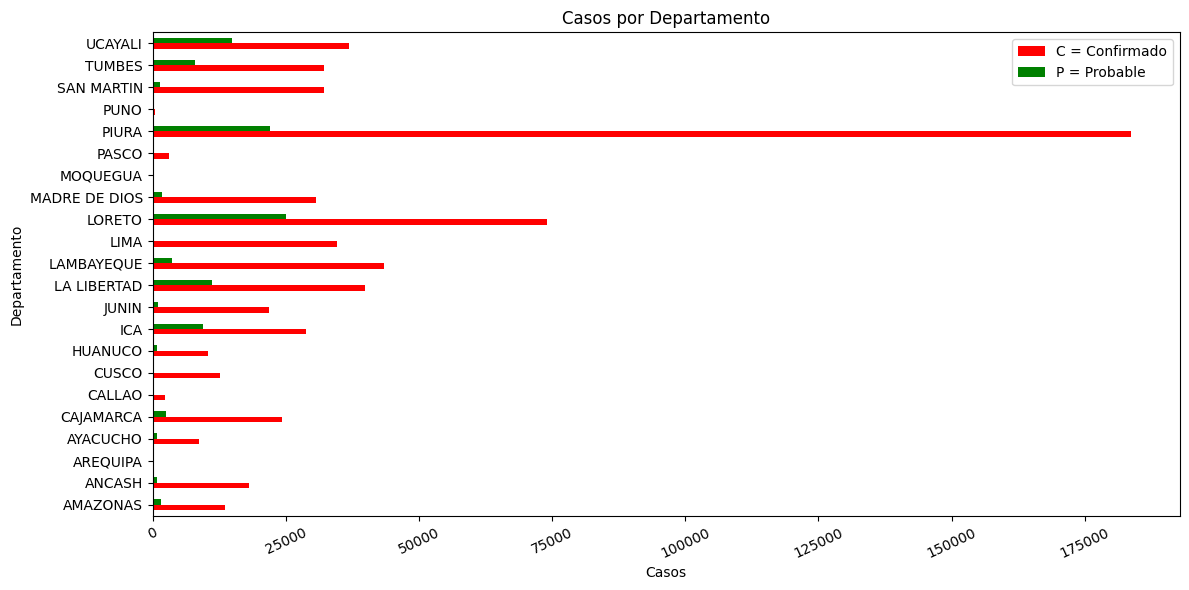

In [ ]:
caso_dep=df.groupby(["departamento","tipo_dx"])["tipo_dx"].value_counts().unstack()

caso_dep.plot(kind="barh", color=['red','green'],figsize=(12, 6))
plt.legend(["C = Confirmado","P = Probable"])
plt.title("Casos por Departamento")
plt.ylabel("Departamento")
plt.xticks(rotation=25)
plt.xlabel("Casos")
plt.tight_layout()
plt.show()

##Tipos de Dengue reportados


In [ ]:
#Grafico de dengues
enfermedad=df.groupby("año")["enfermedad"].value_counts().unstack()

t_enfermedad=enfermedad.reset_index()
t_enfermedad

enfermedad,año,DENGUE CON SIGNOS DE ALARMA,DENGUE GRAVE,DENGUE SIN SIGNOS DE ALARMA
0,2000,NaN,NaN,5557.0
1,2001,NaN,250.0,23276.0
2,2002,1.0,14.0,8071.0
3,2003,NaN,15.0,3334.0
4,2004,NaN,34.0,9513.0
5,2005,NaN,15.0,5625.0
6,2006,NaN,4.0,4018.0
7,2007,NaN,35.0,6309.0
8,2008,NaN,35.0,12789.0
9,2009,NaN,11.0,13396.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015'),
  Text(16, 0, '2016'),
  Text(17, 0, '2017'),
  Text(18, 0, '2018'),
  Text(19, 0, '2019'),
  Text(20, 0, '2020'),
  Text(21, 0, '2021'),
  Text(22, 0, '2022'),
  Text(23, 0, '2023')])

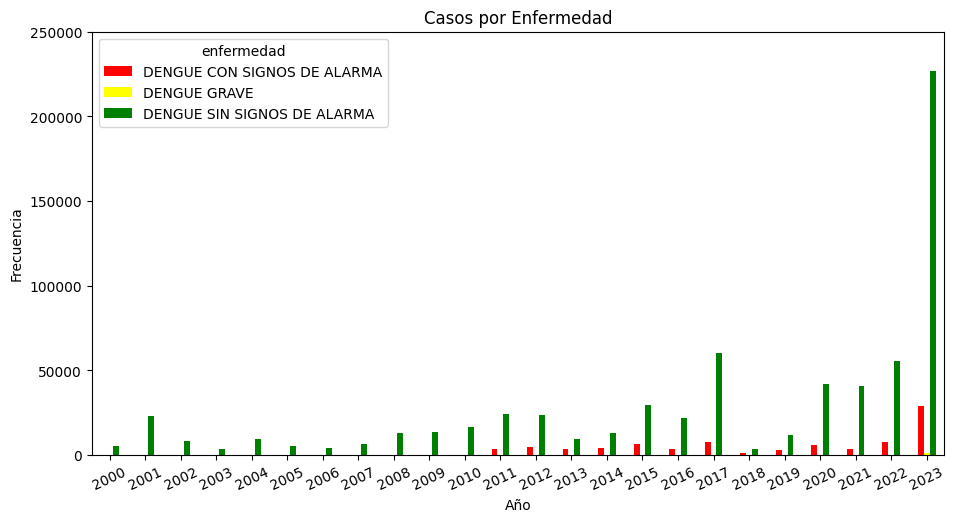

In [ ]:
enfermedad.plot(kind="bar",color=['red','yellow','green'],figsize=(11, 5.5))
plt.title("Casos por Enfermedad")
plt.ylim(0, 250000)
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.xticks(rotation=25)

In [ ]:
evolucion=df.groupby("año")["año"].count()

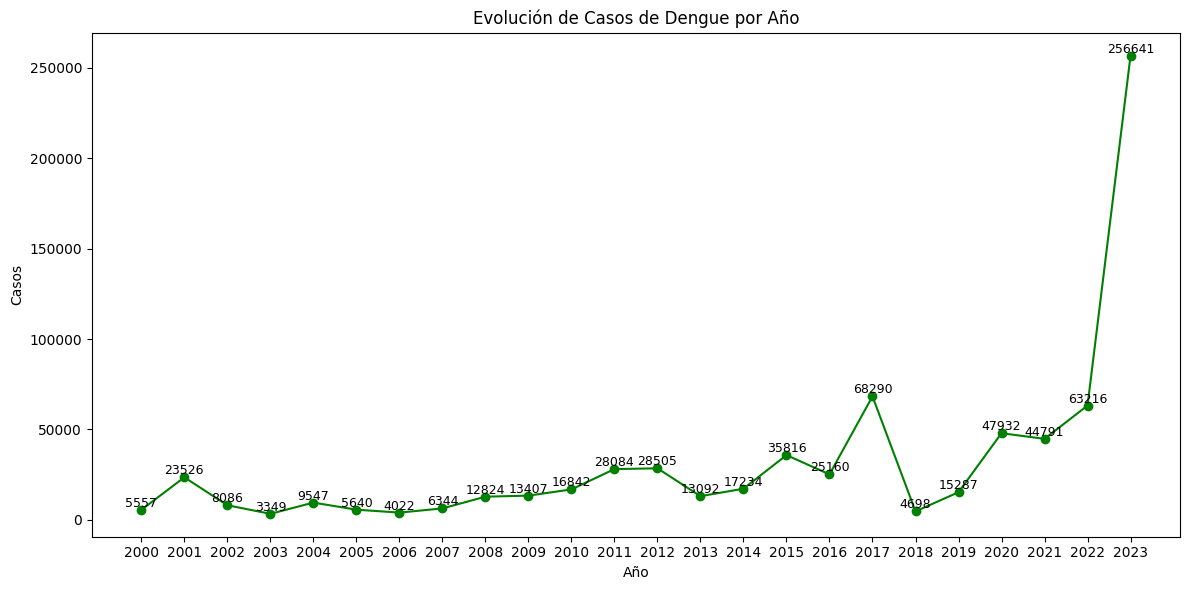

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(evolucion.index,evolucion.values,marker='o', color='g')
# Agregar las etiquetas con la cantidad de casos en cada punto
for i, (x, y) in enumerate(zip(evolucion.index, evolucion.values)):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=9)

plt.title("Evolución de Casos de Dengue por Año")
plt.xticks(evolucion.index)
plt.xlabel("Año")
plt.ylabel("Casos")
plt.tight_layout()
plt.show()

¿A quienes afecta más?

¿Cuales fueron las edades mjas afectadas a lo largo de los años?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015'),
  Text(16, 0, '2016'),
  Text(17, 0, '2017'),
  Text(18, 0, '2018'),
  Text(19, 0, '2019'),
  Text(20, 0, '2020'),
  Text(21, 0, '2021'),
  Text(22, 0, '2022'),
  Text(23, 0, '2023')])

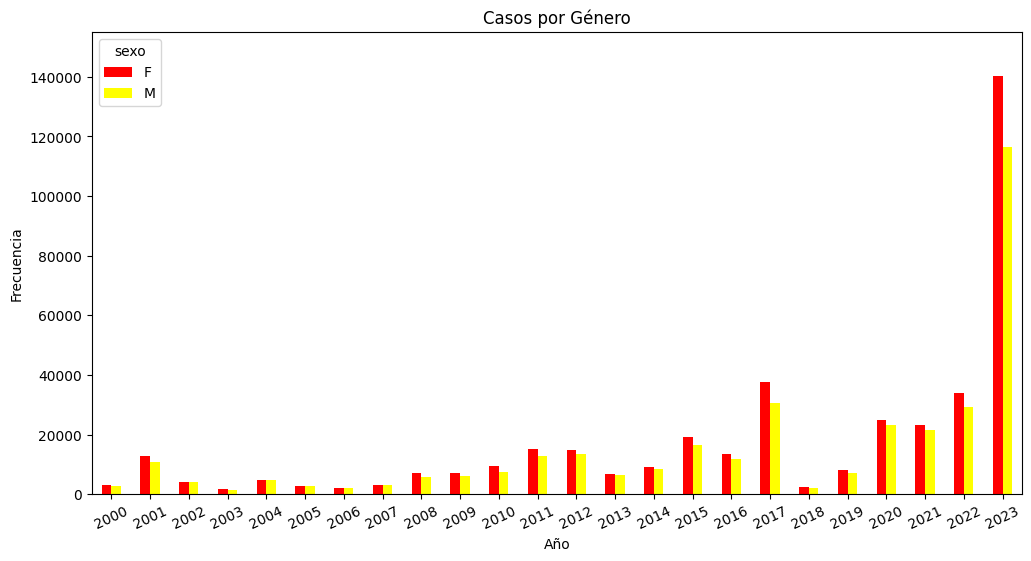

In [ ]:
afect=df.groupby("año")["sexo"].value_counts().unstack()

afect.plot(kind="bar",color=['red','yellow'],figsize=(12, 6))
plt.title("Casos por Género")
plt.ylim(0, 155000)
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.xticks(rotation=25)


Seleccion de datos numericos y cateoricos

In [ ]:
df_num=df.select_dtypes(include=["int64","float64"]).columns

df_cat=df.select_dtypes(include=["object"]).columns

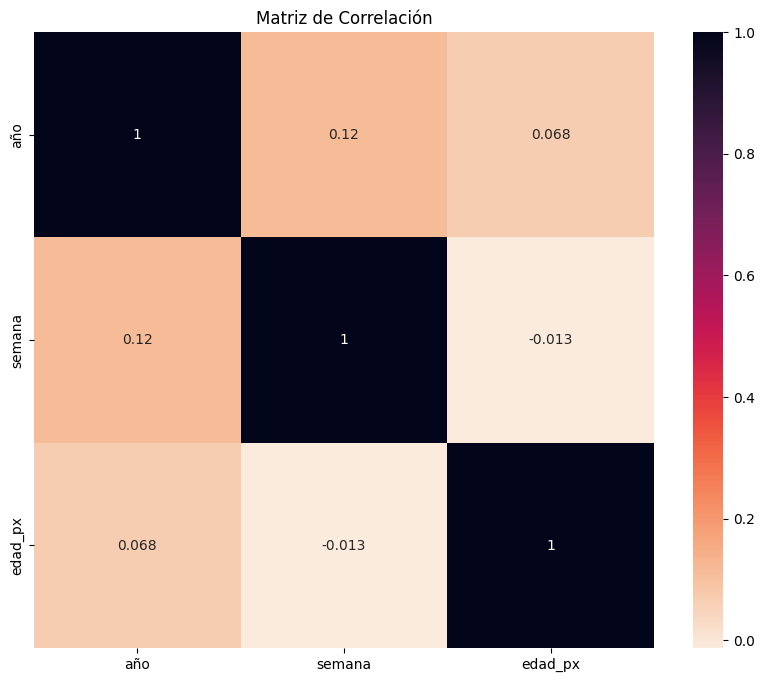

In [ ]:
# Correlación entre variables numéricas
plt.figure(figsize=(10, 8))
correlacion = df[dfnum].corr()
sns.heatmap(correlacion, annot=True, cmap='rocket_r')
plt.title('Matriz de Correlación')
plt.show()

A continuación codificaremos los valores String con one hot encoder

##Predicción del riesgo de brote de dengue-RL

Regresion lineal

In [ ]:
df_rl = df.copy()  # Creamos una copia del dataframe

df_rl['numero_casos'] = df_rl.groupby(['departamento', 'provincia', 'distrito', 'año', 'semana'])['enfermedad'].transform('count')
df_rl.sort_values(by=['año','semana'],ascending=True).head()

,departamento,provincia,distrito,enfermedad,año,semana,tipo_dx,sexo,edad_px,numero_casos
1571,LORETO,MAYNAS,IQUITOS,DENGUE SIN SIGNOS DE ALARMA,2000,1,P,M,74.0,7
1649,LORETO,ALTO AMAZONAS,YURIMAGUAS,DENGUE SIN SIGNOS DE ALARMA,2000,1,C,F,44.0,3
1667,LORETO,MAYNAS,IQUITOS,DENGUE SIN SIGNOS DE ALARMA,2000,1,P,F,31.0,7
1771,LORETO,MAYNAS,IQUITOS,DENGUE SIN SIGNOS DE ALARMA,2000,1,P,F,21.0,7
1786,LORETO,ALTO AMAZONAS,YURIMAGUAS,DENGUE SIN SIGNOS DE ALARMA,2000,1,C,F,21.0,3


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Aplicar Label Encoding a la variable 'enfermedad' para convertirla en valores numéricos
label_encoder = LabelEncoder()
df_rl['enfermedad'] = label_encoder.fit_transform(df_rl['enfermedad'])


In [ ]:
# Codificación jerárquica por frecuencia
for col in ['departamento', 'provincia', 'distrito']:
    freq_encoding = df_rl[col].value_counts(normalize=True).to_dict()
    df_rl[col] = df_rl[col].map(freq_encoding)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Aplicamos One-Hot Encoding sin eliminar categorías
encoder = OneHotEncoder(sparse_output=False)  # ¡Corrección aquí!
encoded_cols = encoder.fit_transform(df_rl[['tipo_dx', 'sexo']])

# Convertimos a DataFrame
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['tipo_dx', 'sexo']))

# Agregamos al DataFrame original
df_rl = pd.concat([df_rl, encoded_df], axis=1).drop(columns=['tipo_dx', 'sexo'])

# Mostramos los primeros valores
df_rl.head()



,departamento,provincia,distrito,enfermedad,año,semana,edad_px,numero_casos,tipo_dx_C,tipo_dx_P,sexo_F,sexo_M
0,0.014968,0.011908,0.000830,2,2000,47,9.0,1,0.0,1.0,0.0,1.0
1,0.014968,0.011908,0.000830,2,2000,40,18.0,2,0.0,1.0,1.0,0.0
2,0.014968,0.011908,0.001508,2,2000,48,32.0,5,1.0,0.0,1.0,0.0
3,0.014968,0.011908,0.001508,2,2000,37,40.0,1,0.0,1.0,1.0,0.0
4,0.014968,0.011908,0.000429,2,2000,42,16.0,1,1.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_rl[['edad_px', 'semana']] = scaler.fit_transform(df_rl[['edad_px', 'semana']])

# Verificamos el resultado final
df_rl.head()


,departamento,provincia,distrito,enfermedad,año,semana,edad_px,numero_casos,tipo_dx_C,tipo_dx_P,sexo_F,sexo_M
0,0.014968,0.011908,0.000830,2,2000,0.884615,0.076923,1,0.0,1.0,0.0,1.0
1,0.014968,0.011908,0.000830,2,2000,0.750000,0.153846,2,0.0,1.0,1.0,0.0
2,0.014968,0.011908,0.001508,2,2000,0.903846,0.273504,5,1.0,0.0,1.0,0.0
3,0.014968,0.011908,0.001508,2,2000,0.692308,0.341880,1,0.0,1.0,1.0,0.0
4,0.014968,0.011908,0.000429,2,2000,0.788462,0.136752,1,1.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separar variables predictoras (X) y variable objetivo (y)
X = df_rl.drop(columns=['numero_casos'])  # Todas las columnas excepto la variable objetivo
y = df_rl['numero_casos']  # Variable objetivo

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Inicializar y entrenar el modelo de Regresión Lineal Múltiple
modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicciones en el conjunto de prueba
y_pred = modelo_rl.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')

MSE: 59577.1646
R²: 0.3213


##

##Predicción del riesgo de brote de dengue-Arima

AutoRegressive Integrated Moving Average)

Objetivo: Modelar la evolución de casos a lo largo del tiempo y predecir futuras incidencias.

In [ ]:
df_arima = df.copy()  # Creamos una copia del dataframe

df_arima['numero_casos'] = df_arima.groupby(['departamento', 'provincia', 'distrito', 'año', 'semana'])['enfermedad'].transform('count')
df_arima.sort_values(by=['año','semana'],ascending=True).head()

,departamento,provincia,distrito,enfermedad,año,semana,tipo_dx,sexo,edad_px,numero_casos
1571,LORETO,MAYNAS,IQUITOS,DENGUE SIN SIGNOS DE ALARMA,2000,1,P,M,74.0,7
1649,LORETO,ALTO AMAZONAS,YURIMAGUAS,DENGUE SIN SIGNOS DE ALARMA,2000,1,C,F,44.0,3
1667,LORETO,MAYNAS,IQUITOS,DENGUE SIN SIGNOS DE ALARMA,2000,1,P,F,31.0,7
1771,LORETO,MAYNAS,IQUITOS,DENGUE SIN SIGNOS DE ALARMA,2000,1,P,F,21.0,7
1786,LORETO,ALTO AMAZONAS,YURIMAGUAS,DENGUE SIN SIGNOS DE ALARMA,2000,1,C,F,21.0,3


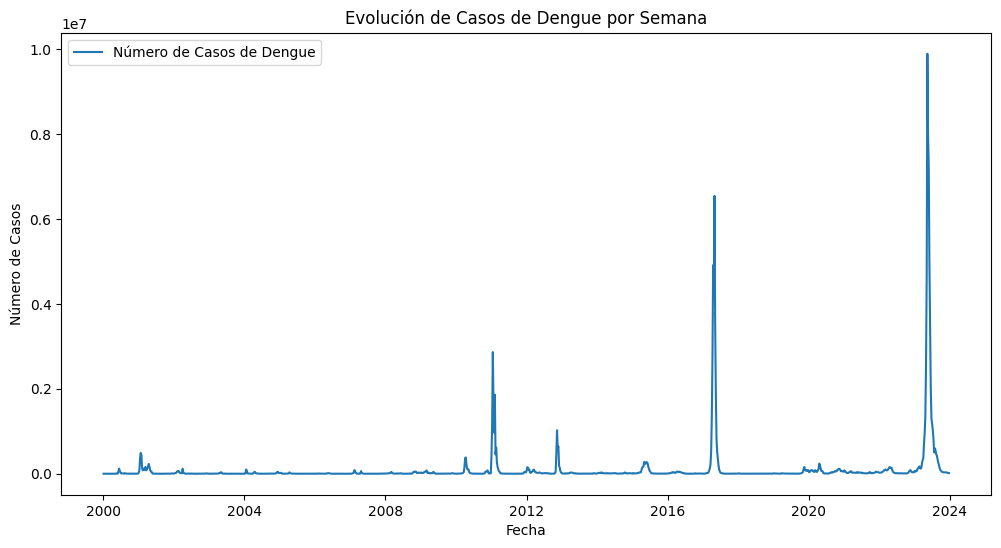

Estadístico de ADF: -9.752334169409158
Valor p: 7.954586218550079e-17


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Asegúrate de que 'df' es el dataframe que contiene tus datos

# Agrupar por año y semana para obtener el número total de casos por semana
df_time_series = df_arima.groupby(['año', 'semana'])['numero_casos'].sum().reset_index()

# Crear la columna de fecha usando el primer día de la semana (lunes)
df_time_series['fecha'] = pd.to_datetime(df_time_series['año'].astype(str) + '-' + df_time_series['semana'].astype(str) + '-1', format='%Y-%W-%w')

# Establecer la fecha como índice
df_time_series.set_index('fecha', inplace=True)

# Visualizar la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(df_time_series['numero_casos'], label='Número de Casos de Dengue')
plt.title('Evolución de Casos de Dengue por Semana')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.legend()
plt.show()

# Verificar si la serie es estacionaria usando el test de Dickey-Fuller
adf_test = adfuller(df_time_series['numero_casos'])
adf_test_statistic, p_value = adf_test[0], adf_test[1]

print(f'Estadístico de ADF: {adf_test_statistic}')
print(f'Valor p: {p_value}')




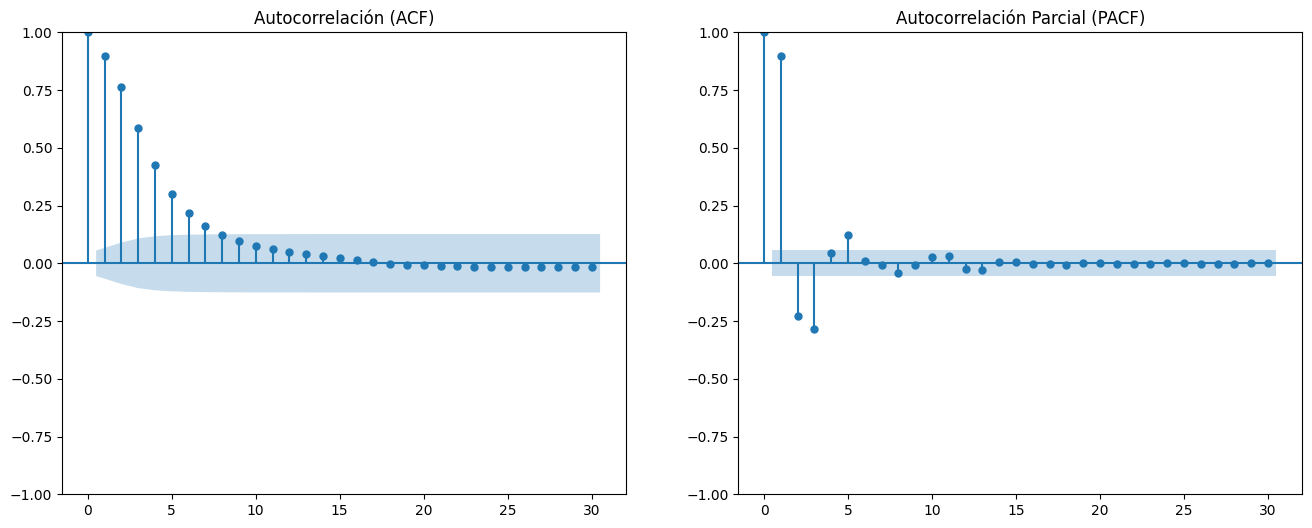

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(df_time_series['numero_casos'], ax=axes[0], lags=30)
axes[0].set_title('Autocorrelación (ACF)')

plot_pacf(df_time_series['numero_casos'], ax=axes[1], lags=30)
axes[1].set_title('Autocorrelación Parcial (PACF)')

plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Definir el modelo ARIMA con p=2, d=0, q=3
modelo_arima = ARIMA(df_time_series['numero_casos'], order=(1, 0, 2))

# Ajustar el modelo
modelo_ajustado = modelo_arima.fit()

# Mostrar resumen del modelo
print(modelo_ajustado.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           numero_casos   No. Observations:                 1253
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -17282.977
Date:                Fri, 04 Apr 2025   AIC                          34575.953
Time:                        14:06:20   BIC                          34601.620
Sample:                             0   HQIC                         34585.601
                               - 1253                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.676e+04   4.47e-10   2.16e+14      0.000    9.68e+04    9.68e+04
ar.L1          0.8059      0.005    161.852      0.000       0.796       0.816
ma.L1          0.2125      0.007     28.874      0.0

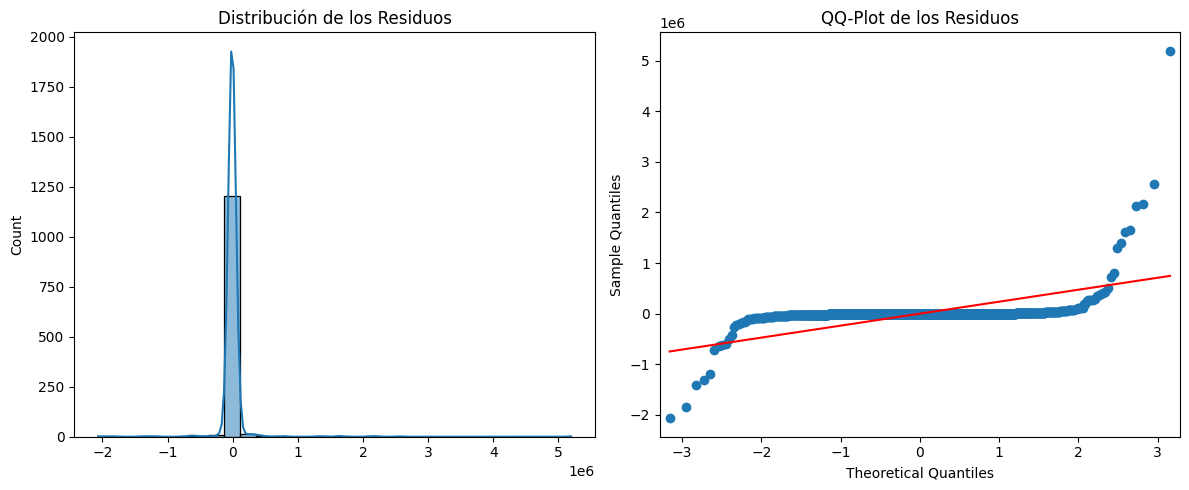

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Obtener residuos del modelo
residuos = modelo_ajustado.resid

# Histograma y QQ-Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de los residuos
sns.histplot(residuos, bins=30, kde=True, ax=ax[0])
ax[0].set_title("Distribución de los Residuos")

# QQ-Plot para normalidad
sm.qqplot(residuos, line="s", ax=ax[1])
ax[1].set_title("QQ-Plot de los Residuos")

plt.tight_layout()
plt.show()


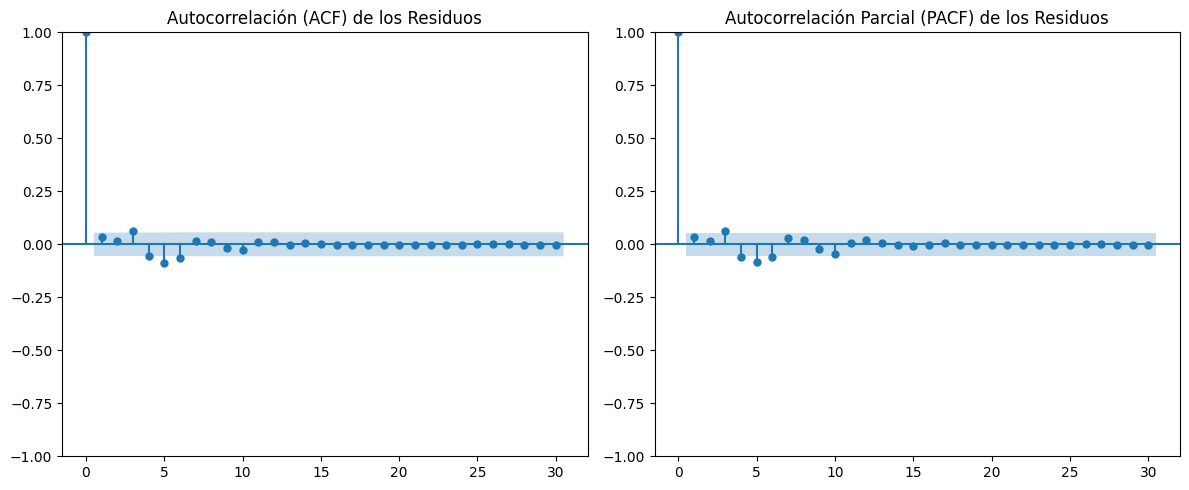

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# ACF (Autocorrelación)
sm.graphics.tsa.plot_acf(residuos, lags=30, ax=ax[0])
ax[0].set_title("Autocorrelación (ACF) de los Residuos")

# PACF (Autocorrelación Parcial)
sm.graphics.tsa.plot_pacf(residuos, lags=30, ax=ax[1])
ax[1].set_title("Autocorrelación Parcial (PACF) de los Residuos")

plt.tight_layout()
plt.show()


##Predicción del riesgo de brote de dengue- LSTM

Redes neuronales tipo LSTM (si usas series de tiempo)


---




Entrada (X) - Variables de entrada

📍 Ubicación: departamento, provincia, distrito

📆 Tiempo: año, semana

👤 Demografía: sexo, edad_px

--

Salida (Y) - Variable objetivo

🎯 Número de casos de dengue en una semana dentro de un distrito

In [ ]:
# A continuación haremos una copia del DataFrame Original para poder usar la data orignial posteriormente en otros algoritmos
df_copy = df.copy()

¿Por que codificamos con cat code y no one hot encoding?

✅ Evita la explosión de dimensionalidad.

✅ Mantiene la relación jerárquica entre las regiones.

✅ Es más eficiente para modelos de Machine Learning como LSTM o XGBoost.

In [ ]:
df_copy=df.copy()



In [ ]:
# Crear una nueva columna combinando las tres variables geográficas
df_copy['combinacion_geo'] = df_copy['departamento'] + '_' + df_copy['provincia'] + '_' + df_copy['distrito']


df_copy['numero_casos'] = df_copy.groupby(['combinacion_geo', 'año', 'semana'])['enfermedad'].transform('count')
df_copy.sort_values(by=['año','semana'],ascending=True).head()




,departamento,provincia,distrito,enfermedad,año,semana,tipo_dx,sexo,edad_px,combinacion_geo,numero_casos
1571,LORETO,MAYNAS,IQUITOS,DENGUE SIN SIGNOS DE ALARMA,2000,1,P,M,74.0,LORETO_MAYNAS_IQUITOS,7
1649,LORETO,ALTO AMAZONAS,YURIMAGUAS,DENGUE SIN SIGNOS DE ALARMA,2000,1,C,F,44.0,LORETO_ALTO AMAZONAS_YURIMAGUAS,3
1667,LORETO,MAYNAS,IQUITOS,DENGUE SIN SIGNOS DE ALARMA,2000,1,P,F,31.0,LORETO_MAYNAS_IQUITOS,7
1771,LORETO,MAYNAS,IQUITOS,DENGUE SIN SIGNOS DE ALARMA,2000,1,P,F,21.0,LORETO_MAYNAS_IQUITOS,7
1786,LORETO,ALTO AMAZONAS,YURIMAGUAS,DENGUE SIN SIGNOS DE ALARMA,2000,1,C,F,21.0,LORETO_ALTO AMAZONAS_YURIMAGUAS,3


In [ ]:
# Eliminar las columnas originales de departamento, provincia y distrito
df_copy = df_copy.drop(columns=['departamento', 'provincia', 'distrito'])

# Ver las primeras filas para asegurarnos que se eliminaron correctamente
df_copy.head()


,enfermedad,año,semana,tipo_dx,sexo,edad_px,combinacion_geo,numero_casos
0,DENGUE SIN SIGNOS DE ALARMA,2000,47,P,M,9.0,HUANUCO_LEONCIO PRADO_LUYANDO,1
1,DENGUE SIN SIGNOS DE ALARMA,2000,40,P,F,18.0,HUANUCO_LEONCIO PRADO_LUYANDO,2
2,DENGUE SIN SIGNOS DE ALARMA,2000,48,C,F,32.0,HUANUCO_LEONCIO PRADO_JOSE CRESPO Y CASTILLO,5
3,DENGUE SIN SIGNOS DE ALARMA,2000,37,P,F,40.0,HUANUCO_LEONCIO PRADO_JOSE CRESPO Y CASTILLO,1
4,DENGUE SIN SIGNOS DE ALARMA,2000,42,C,M,16.0,HUANUCO_LEONCIO PRADO_MARIANO DAMASO BERAUN,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
label_encoder = LabelEncoder()

# Aplicar Label Encoding a las variables categóricas
df_copy['enfermedad'] = label_encoder.fit_transform(df_copy['enfermedad'])
df_copy['tipo_dx'] = label_encoder.fit_transform(df_copy['tipo_dx'])
df_copy['sexo'] = label_encoder.fit_transform(df_copy['sexo'])
df_copy['combinacion_geo'] = label_encoder.fit_transform(df_copy['combinacion_geo'])

# Ver los primeros valores después de la codificación
df_copy.head()


,enfermedad,año,semana,tipo_dx,sexo,edad_px,combinacion_geo,numero_casos
0,2,2000,47,1,1,9.0,154,1
1,2,2000,40,1,0,18.0,154,2
2,2,2000,48,0,0,32.0,153,5
3,2,2000,37,1,0,40.0,153,1
4,2,2000,42,0,1,16.0,155,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear el escalador
scaler = MinMaxScaler()

# Normalizar las variables numéricas
df_copy[['año', 'semana', 'edad_px', 'combinacion_geo']] = scaler.fit_transform(df_copy[['año', 'semana', 'edad_px', 'combinacion_geo']])

# Ver los primeros valores después de la normalización
df_copy.head()


,enfermedad,año,semana,tipo_dx,sexo,edad_px,combinacion_geo,numero_casos
0,2,0.0,0.884615,1,1,0.076923,0.247987,1
1,2,0.0,0.750000,1,0,0.153846,0.247987,2
2,2,0.0,0.903846,0,0,0.273504,0.246377,5
3,2,0.0,0.692308,1,0,0.341880,0.246377,1
4,2,0.0,0.788462,0,1,0.136752,0.249597,1


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X = df_copy.drop(columns=['numero_casos'])  # Variables predictoras
y = df_copy['numero_casos']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Ver los tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (606312, 7)
Tamaño del conjunto de prueba: (151578, 7)


In [ ]:
import numpy as np

# Función para crear secuencias de datos
def create_sequences(X, y, n_steps):
    X_seq, y_seq = [], []
    for i in range(len(X) - n_steps):
        X_seq.append(X.iloc[i:i+n_steps].values)  # Tomamos las últimas 'n_steps' filas
        y_seq.append(y.iloc[i + n_steps])  # El valor de 'numero_casos' que sigue después de la secuencia
    return np.array(X_seq), np.array(y_seq)

# Definir el tamaño de la secuencia (por ejemplo, 10 pasos)
n_steps = 12

# Crear las secuencias para los conjuntos de entrenamiento y prueba
X_train_seq, y_train_seq = create_sequences(X_train, y_train, n_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, n_steps)

# Ver las dimensiones de las secuencias
print(f"X_train_seq shape: {X_train_seq.shape}")
print(f"y_train_seq shape: {y_train_seq.shape}")
print(f"X_test_seq shape: {X_test_seq.shape}")
print(f"y_test_seq shape: {y_test_seq.shape}")


X_train_seq shape: (606300, 12, 7)
y_train_seq shape: (606300,)
X_test_seq shape: (151566, 12, 7)
y_test_seq shape: (151566,)


In [ ]:
# Redimensionar las entradas para el modelo LSTM (samples, time_steps, features)
X_train_seq = X_train_seq.reshape((X_train_seq.shape[0], X_train_seq.shape[1], X_train_seq.shape[2]))
X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], X_test_seq.shape[1], X_test_seq.shape[2]))

# Ver las nuevas dimensiones
print(f"X_train_seq shape (después de redimensionar): {X_train_seq.shape}")
print(f"X_test_seq shape (después de redimensionar): {X_test_seq.shape}")


X_train_seq shape (después de redimensionar): (606300, 12, 7)
X_test_seq shape (después de redimensionar): (151566, 12, 7)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2

# Crear el modelo LSTM mejorado
model_v2 = Sequential()

# Primera capa LSTM con return_sequences=True para pasar la secuencia completa
model_v2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model_v2.add(Dropout(0.4))

# Segunda capa LSTM para extraer patrones más complejos
model_v2.add(LSTM(units=30, return_sequences=False))
model_v2.add(Dropout(0.3))

# Capa densa con regularización L2
model_v2.add(Dense(units=15, activation='relu', kernel_regularizer=l2(0.02)))
model_v2.add(Dense(units=1))

# Compilar el modelo con RMSprop y learning rate ajustado
opt = RMSprop(learning_rate=0.001)
model_v2.compile(optimizer=opt, loss='mean_squared_error')

# Resumen del modelo
model_v2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                       │ (None, 12, 50)              │          11,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 30)                  │           9,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,801 (85.16 KB)

 Trainable params: 21,801 (85.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenamiento con EarlyStopping para evitar sobreajuste
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_v2 = model_v2.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test_seq),
                           callbacks=[early_stop])

# Guardamos el modelo mejorado
model_v2.save("modelo_dengue_lstm_v2.h5")


Epoch 1/10
18947/18947 ━━━━━━━━━━━━━━━━━━━━ 153s 8ms/step - loss: 79351.7188 - val_loss: 92363.7500
Epoch 2/10
18947/18947 ━━━━━━━━━━━━━━━━━━━━ 194s 8ms/step - loss: 63840.5781 - val_loss: 92602.5391
Epoch 3/10
18947/18947 ━━━━━━━━━━━━━━━━━━━━ 152s 8ms/step - loss: 60296.0664 - val_loss: 104958.6016
Epoch 4/10
18947/18947 ━━━━━━━━━━━━━━━━━━━━ 197s 8ms/step - loss: 59885.2070 - val_loss: 98665.2109
Epoch 5/10
18947/18947 ━━━━━━━━━━━━━━━━━━━━ 200s 8ms/step - loss: 58884.9492 - val_loss: 107487.8672
Epoch 6/10
18947/18947 ━━━━━━━━━━━━━━━━━━━━ 146s 8ms/step - loss: 58630.9961 - val_loss: 97918.9922


4737/4737 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
🔹 Mean Squared Error (MSE): 92353.45
🔹 Mean Absolute Error (MAE): 184.86
🔹 Root Mean Squared Error (RMSE): 303.90


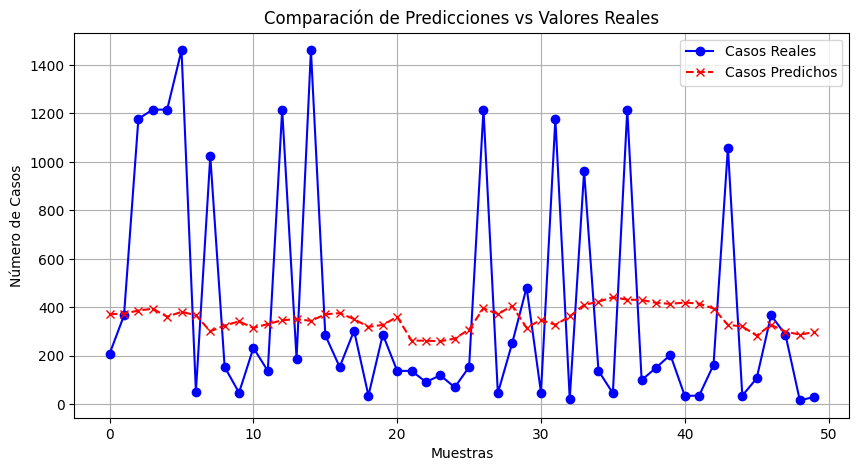

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Hacer predicciones con el modelo
y_pred = model_v2.predict(X_test_seq)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test_seq, y_pred)
mae = mean_absolute_error(y_test_seq, y_pred)
rmse = np.sqrt(mse)

print(f'🔹 Mean Squared Error (MSE): {mse:.2f}')
print(f'🔹 Mean Absolute Error (MAE): {mae:.2f}')
print(f'🔹 Root Mean Squared Error (RMSE): {rmse:.2f}')

# 🔹 Visualización de la Comparación 🔹
plt.figure(figsize=(10, 5))

# Graficamos valores reales vs predichos
plt.plot(y_test_seq[:50], label='Casos Reales', color='blue', marker='o')
plt.plot(y_pred[:50], label='Casos Predichos', color='red', linestyle='dashed', marker='x')

plt.xlabel("Muestras")
plt.ylabel("Número de Casos")
plt.title("Comparación de Predicciones vs Valores Reales")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test_seq, y_test_seq)

print(f"Pérdida en el conjunto de prueba: {test_loss}")


4737/4737 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 123943.8125
Pérdida en el conjunto de prueba: 97659.390625


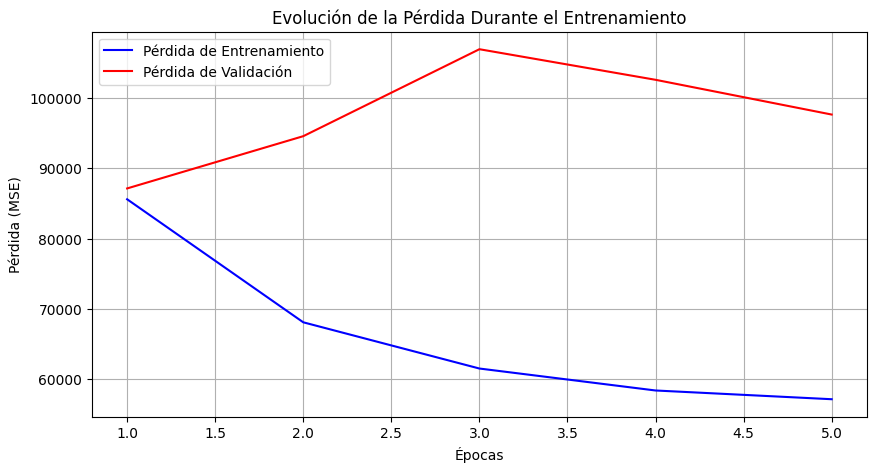

In [ ]:
import matplotlib.pyplot as plt

# Obtener los valores de la historia del entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Graficar la pérdida del modelo
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, label='Pérdida de Entrenamiento', color='blue')
plt.plot(epochs, val_loss, label='Pérdida de Validación', color='red')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.title('Evolución de la Pérdida Durante el Entrenamiento')
plt.legend()
plt.grid()
plt.show()
